<b>¡Hola Radha!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

Preparacion de Datos 

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> El proceso de preparación de datos fue realizado de manera clara y eficiente. La conversión de tipos de datos y el manejo de valores ausentes están bien justificados. Además, rellenar los valores faltantes con la media y mediana fue una buena decisión para mantener la integridad del análisis. </div> <div class="alert alert-block alert-warning"> <b>Atención</b> <a class="tocSkip"></a> Sería útil explicar por qué optaste por eliminar directamente las filas con valores ausentes en 'name' y 'genre', ya que podrías haber considerado otros enfoques, como asignar valores predeterminados o investigar más sobre los juegos faltantes.</div>

In [29]:
import pandas as pd

games_data = pd.read_csv('games.csv')

# Convertir a minisculas los nombres de las columnas
games_data.columns = [col.lower() for col in games_data.columns]

# Convertir 'year_of_release' a entero
games_data['year_of_release'] = games_data['year_of_release'].astype('Int64')

# Convertir 'user_score' a flotante
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce')


print(games_data.info())
games_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Descripción de las columnas modificadas

 `year_of_release`
 Esta columna contiene la informacion del año de lanzamiento de los videojuegos. Estaba en formato "float64" y fue cambiado a "Int64". El año de lanzamiento debe ser un valor entero, por lo que cambiar a este formato es mas apropiado y nos permitira manejar los valores faltantes de mejor manera. 


 `user_score`
 Esta columna nos muestra la puntuacion que los usuarios han dado a los diversos juegos. Esta calificacion es dada en un formato numerico y con decimales. Originalmente estava en formato "objetc" y este formato incluye valores no numericos o textos, por lo que fue cambiado a "float64", para poder llevar un mejor manejo de estos numeros con decimales. Los valores no convertibles se veran como NaN.


In [54]:
# Identificar los valores ausentes en cada columna
missing_values = games_data.isnull().sum()

# Filtrar las filas donde 'name' es NaN
missing_names = games_data[games_data['name'].isnull()]

# Eliminar las filas con valores ausentes en 'name' o 'genre'
games_data_cleaned = games_data.dropna(subset=['name', 'genre'])

# Calcular la mediana de la columna 'year_of_release', ignorando los valores ausentes
median_year = games_data['year_of_release'].median()

# Rellenar los valores ausentes en 'year_of_release' con la mediana
games_data_cleaned['year_of_release'].fillna(median_year, inplace=True)


# Calcular la media para 'critic_score'
mean_critic_score = games_data_cleaned['critic_score'].mean()

# Rellenar los valores ausentes en 'critic_score' con la media
games_data_cleaned['critic_score'].fillna(mean_critic_score, inplace=True)


# Forzar la conversión de 'user_score' a numérico, convirtiendo valores no numéricos a NaN
games_data_cleaned['user_score'] = pd.to_numeric(games_data_cleaned['user_score'], errors='coerce')

# Calcular la media para 'user_score'
mean_user_score = games_data_cleaned['user_score'].mean()

# Rellenar los valores ausentes en 'user_score' con la media
games_data_cleaned['user_score'].fillna(mean_user_score, inplace=True)

# Rellenar los valores ausentes en 'rating' con 'Desconocido'
games_data_cleaned['rating'].fillna('Desconocido', inplace=True)






/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/tmp/ipykernel_31/3770582350.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_data_cleaned['user_score'] = pd.to_numeric(games_data_cleaned['user_score'], errors='coerce')





### Datos Ausentes
- Eliminación de filas con valores ausentes en las columnas `name` y `genre`.
  Eran solamente dos filas, que tenian valores ausentes tanto en la columna name como genre. Decidi eliminarlas pues son una parte minima de todo el data frame y eliminarlas me parecio la forma mas practica de resolver los datos ausentes en estas columnas. 
- Relleno de valores ausentes en `year_of_release` con la media (se decidió cambiar a la mediana en el análisis). Eran 269 valores ausentes. 
- Relleno de valores ausentes en `critic_score` con la media. Eran 8578 valores ausentes. 
- Relleno de valores ausentes en `user_score` con la media. Eran  9125 valores ausentes. 
 En las 3 filas anteriores, eran bastantes los datos ausentes, revise para cada una de ellas, los datos estadisticos, es decir, el valor maximo, el minimo, la media, la mediana, y el tipo de datos. En las 3 columnas, la diferencia entre media y mediana eran minimas, por lo que resolvi a rellenar con la media en critic score y user score, y aunque mi intencion era la media tambien en la columna year of release, lo hice con la mediana por un descuido, sin embargo eran decimas de diferencia, asi que lo deje asi. 
- Relleno de valores ausentes en `rating` con "Desconocido". Eran 6766 valores ausentes.
 En la columna rating el tratado fue distinto, pues no son valores numericos, por lo que no se puede calcular una media o mediana para rellenar, en esta columna, rellene simplemente con un valor determinado "desconocido". 

- Todos los valores ausentes han sido tratados.


Los valores ausentes en el dataset pueden deberse a diversas razones:

-Errores de Registro o Ingreso de Datos: Puede haber errores durante la recopilación o entrada de datos, lo que resulta en   campos vacíos. 

-Datos No Disponibles: En algunos casos, ciertos datos pueden no estar disponibles para todos los juegos. Por ejemplo, algunos   juegos pueden no tener una calificación del crítico o del usuario registrada si estos datos no se recopilan para todos los juegos.

-Inconsistencias en las Fuentes de Datos: La fuente de datos puede tener inconsistencias, como registros incompletos o formatos variados. Esto puede ocurrir si los datos provienen de diferentes plataformas o bases de datos que tienen criterios de recopilación distintos.

-Actualizaciones o Cambios en la Información: Es posible que algunos datos se hayan actualizado o modificado con el tiempo, y la versión del dataset que tenemos puede no reflejar la información más reciente o completa.



Manejo de Casos con Abreviatura TBD

Cuando se encuentra la abreviatura TBD ("to be determined") en los datos, esto generalmente indica que la información aún no ha sido proporcionada o no está disponible. Aquí está el plan para manejar estos casos:

Sustitución con Valor Predeterminado: Rellenaremos los valores ausentes con un valor predeterminado como "Desconocido" o una representación que indique claramente que la información está pendiente o no está disponible. Esto permite que el análisis continúe sin perder la integridad de los datos.

Documentación y Notificación: Es importante documentar cómo se manejaron estos casos en el análisis. Se debe incluir una nota en el informe o en el notebook indicando que los valores ausentes fueron reemplazados por "Desconocido" y explicar el razonamiento detrás de esta decisión.

Consideración en el Análisis: Al realizar análisis y visualizaciones, se debe tener en cuenta que algunos datos han sido rellenados con valores predeterminados. Esto puede afectar el análisis y la interpretación de los resultados, por lo que se debe considerar la posibilidad de que estos valores representen una categoría especial o un estado desconocido.

Al seguir este enfoque, garantizamos que el dataset sea lo más completo posible y que cualquier análisis futuro tenga en cuenta la naturaleza de los datos ausentes.


In [31]:

# Verifica que las columnas de ventas estén presentes y son numéricas
print(games_data_cleaned[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].dtypes)

# Calcula las ventas totales para cada juego sumando las ventas en todas las regiones
games_data_cleaned['total_sales'] = (games_data_cleaned['na_sales'] +
                                     games_data_cleaned['eu_sales'] +
                                     games_data_cleaned['jp_sales'] +
                                     games_data_cleaned['other_sales'])


# Mostrar las primeras líneas del DataFrame
print(games_data_cleaned.head())


na_sales       float64
eu_sales       float64
jp_sales       float64
other_sales    float64
dtype: object
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN    

/tmp/ipykernel_31/3653659539.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_data_cleaned['total_sales'] = (games_data_cleaned['na_sales'] +


1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


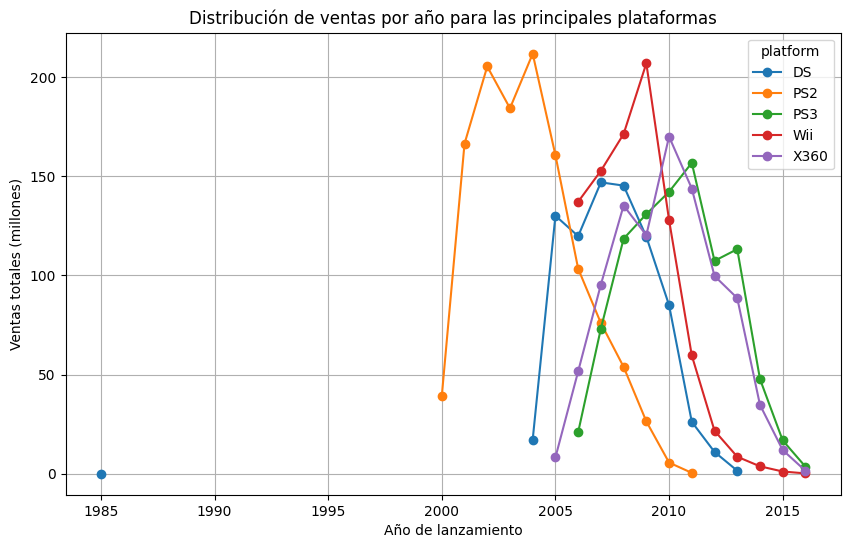

Primer año de lanzamiento para cada plataforma:
platform
2600    1980
3DO     1994
3DS     2011
DC      1998
DS      1985
GB      1988
GBA     2000
GC      2001
GEN     1990
GG      1992
N64     1996
NES     1983
NG      1993
PC      1985
PCFX    1996
PS      1994
PS2     2000
PS3     2006
PS4     2013
PSP     2004
PSV     2011
SAT     1994
SCD     1993
SNES    1990
TG16    1995
WS      1999
Wii     2006
WiiU    2012
X360    2005
XB      2000
XOne    2013
Name: year_of_release, dtype: Int64
Último año de ventas para cada plataforma:
platform
2600    1989
3DO     1995
3DS     2016
DC      2008
DS      2013
GB      2001
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2002
NES     1994
NG      1996
PC      2016
PCFX    1996
PS      2003
PS2     2011
PS3     2016
PS4     2016
PSP     2015
PSV     2016
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
Wii     2016
WiiU    2016
X360    2016
XB      2008
XOne    2016
Name: year_of_release, dtype: Int64
Duración de l

In [32]:
# Contar cuántos juegos fueron lanzados en cada año
games_per_year = games_data_cleaned['year_of_release'].value_counts().sort_index()

# Mostrar los lanzamientos de juegos por año
print(games_per_year)

# Agrupar por plataforma y sumar las ventas totales
platform_sales = games_data_cleaned.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Mostrar las plataformas con mayores ventas
platform_sales.head(10)


import matplotlib.pyplot as plt

# Filtrar las principales plataformas con mayores ventas
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

# Filtrar los datos para solo incluir las plataformas principales
top_platforms_data = games_data_cleaned[games_data_cleaned['platform'].isin(top_platforms)]

# Agrupar por plataforma y año, y sumar las ventas por año
platform_year_sales = top_platforms_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

# Graficar las ventas de las plataformas principales a lo largo de los años
platform_year_sales.T.plot(kind='line', figsize=(10,6), marker='o')
plt.title('Distribución de ventas por año para las principales plataformas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.grid(True)
plt.show()


# Encontramos el primer año de lanzamiento para cada plataforma
platform_first_release = games_data_cleaned.groupby('platform')['year_of_release'].min()
print("Primer año de lanzamiento para cada plataforma:")
print(platform_first_release)

# Encontramos el último año de ventas para plataformas que ahora tienen ventas nulas
platform_last_sales = games_data_cleaned[games_data_cleaned['total_sales'] > 0].groupby('platform')['year_of_release'].max()
print("Último año de ventas para cada plataforma:")
print(platform_last_sales)

# Unimos las fechas de primer lanzamiento y último año de ventas
platform_duration = platform_last_sales - platform_first_release
print("Duración de la popularidad de cada plataforma:")
print(platform_duration)

# Calculamos la duración media
average_duration = platform_duration.mean()
print("Duración media de la popularidad de las plataformas:")
print(average_duration)




1. Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
Si, son bastante significativos y nos sirven para identificar los procesos que la industria de la produccion de videojuegos ha tenido. Podemos observar que desde el 80 al 93 la produccion por año no superaba ni si quiera los 100 por año, puede que haya pocos registros de esta epoca, o que simplemente la produccion era muy limitada. Desde 1994 la produccion va en incremento hasta superar los 1000 juegos por año en el 2006, donde comienza la epoca de mayor produccion, que se da entre el 2006 y el 2011, llegando en el 2008 al punto maximo de 1427 juegos. A partir del 2011 vemos un declive en la produccion, la cual puede deberse a la diversificacion de consolas, juegos mucho mas complejos y con un mayor desarrollo. Esta información muestra que los datos de cada período son relevantes y reflejan etapas clave en el desarrollo de la industria de videojuegos.

u análisis ya es suficiente para responder la pregunta: la cantidad de juegos lanzados en diferentes años sí parece significativa, especialmente cuando se observa una tendencia creciente en los lanzamientos de juegos desde los años 90 hasta finales de la década de 2000. El pico en 2008 y la posterior caída en los lanzamientos también refleja patrones importantes en la industria, posiblemente debidos a cambios en la tecnología y en el mercado de videojuegos.

Esta información muestra que los datos de cada período son relevantes y reflejan etapas clave en el desarrollo de la industria de videojuegos.

2. Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

La distribución de ventas anuales por plataforma puede variar significativamente. Las plataformas más recientes como la PS4 y la Xbox One muestran ventas hasta años más recientes, mientras que las plataformas más antiguas como el NES o el 2600 tienen ventas que se detienen en décadas pasadas.
Hay plataformas que han durado solo uno, o incluso ni un año, mientras algunas de las mas populares han llegado ha durar una decada o mas. E incluso la pc que duro mas de 30 años. 
La duración media de la popularidad de las plataformas es de aproximadamente 7.61 años. Esto sugiere que, en promedio, una plataforma tiende a mantener una popularidad significativa por alrededor de 7 a 8 años antes de disminuir su relevancia en el mercado.


<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> Has realizado un análisis sólido de la evolución de las ventas a lo largo de los años, identificando los patrones clave en la industria de videojuegos. Las observaciones sobre el auge y declive de las ventas en ciertos períodos están bien fundamentadas. </div> <div class="alert alert-block alert-warning"> <b>Atención</b> <a class="tocSkip"></a> Podrías haber añadido más visualizaciones, como un gráfico de barras o líneas que represente la cantidad de lanzamientos por año, lo cual ayudaría a visualizar mejor la tendencia observada.</div>

3- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
4- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
5- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Período de datos seleccionado
Para construir un modelo para 2017 y basarnos en tendencias recientes del mercado de videojuegos, hemos decidido utilizar los datos del período 2013-2016. Este período abarca los años más relevantes antes del año objetivo (2017) y proporciona información útil sobre el comportamiento de las plataformas en ese tiempo.

Plataformas líderes en ventas
Durante el período 2013-2016, las plataformas líderes en ventas son aquellas que mostraron un crecimiento significativo en al menos uno o varios años. Las plataformas que se destacan en términos de ventas y popularidad son:

PS4: Presentó un crecimiento explosivo en 2014 con un aumento de 74.01 millones de unidades y un crecimiento más moderado en 2015 con 18.90 millones de unidades. A pesar de no tener datos significativos de crecimiento en 2016, sigue siendo una plataforma muy rentable.

Xbox One (XOne): También tuvo un crecimiento notable en 2014, con un aumento de 35.11 millones de unidades, y continuó creciendo en 2015 con 6.07 millones de unidades. Aunque muestra cierta desaceleración, sigue siendo una plataforma de gran potencial.

PC: Aunque el crecimiento de PC no es tan marcado, mostró un crecimiento modesto en 2014 con 0.90 millones de unidades y se mantuvo estable en los años siguientes. PC sigue siendo una plataforma confiable con una base sólida de usuarios.

Plataformas en crecimiento o declive
El análisis de crecimiento y reducción de ventas indica las siguientes tendencias:

Plataformas en declive:

PSV (PlayStation Vita) y WiiU mostraron un crecimiento muy leve en 2014 pero luego se estancaron, lo que sugiere una posible falta de popularidad o interés en los años recientes.
Otras plataformas como PS3, Wii, y Xbox 360 han mostrado una clara tendencia de reducción de ventas en este período, lo que las convierte en menos atractivas para futuras campañas de ventas.
Plataformas potencialmente rentables
Con base en el análisis de crecimiento y estabilidad en ventas, las plataformas más rentables para considerar en una campaña de ventas en 2017 son:

PS4: Su gran crecimiento en años recientes la posiciona como una de las plataformas más atractivas.
Xbox One: Aunque su crecimiento fue más moderado que el de PS4, sigue siendo una plataforma con alto potencial.
PC: Aunque no ha mostrado un crecimiento explosivo, su estabilidad y base de usuarios la hacen una plataforma sólida a largo plazo.
Estas plataformas pueden ser el foco de una estrategia de ventas, ya que han demostrado ser populares y rentables en los años previos a 2017.


<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> La selección de las plataformas líderes en ventas entre 2013 y 2016 está bien fundamentada y apoyada por los datos. El análisis de plataformas en crecimiento como PS4 y Xbox One es pertinente, y reconoces correctamente la estabilidad de la PC. Identificas correctamente las plataformas en declive </div>

In [33]:
# Filtramos los datos solo para los años relevantes (desde 2013 hasta 2016)
relevant_data = games_data_cleaned[games_data_cleaned['year_of_release'] >= 2013]
print("Datos relevantes (2013-2016):")
print(relevant_data.head())

# Agrupamos por plataforma y sumamos las ventas totales en el período relevante
platform_sales_relevant = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Imprimimos las plataformas líderes en ventas
print("Plataformas líderes en ventas (2013-2016):")
print(platform_sales_relevant)


# Agrupamos por plataforma y año, y sumamos las ventas totales
platform_sales_by_year = relevant_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

# Calculamos la diferencia de ventas año a año
platform_sales_growth = platform_sales_by_year.diff(axis=1)

print("Crecimiento o reducción de ventas por plataforma (2013-2016):")
print(platform_sales_growth)


# Filtramos las plataformas que han tenido un crecimiento positivo o estable
growing_platforms = platform_sales_growth[platform_sales_growth > 0].dropna(how='all')

print("Plataformas con tendencia de crecimiento o estabilidad:")
print(growing_platforms)


Datos relevantes (2013-2016):
                         name platform  year_of_release         genre  \
16         Grand Theft Auto V      PS3             2013        Action   
23         Grand Theft Auto V     X360             2013        Action   
31  Call of Duty: Black Ops 3      PS4             2015       Shooter   
33        Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
42         Grand Theft Auto V      PS4             2014        Action   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16      7.02      9.09      0.98         3.96          97.0         8.2   
23      9.66      5.14      0.06         1.41          97.0         8.1   
31      6.03      5.86      0.36         2.38           NaN         NaN   
33      5.28      4.19      4.35         0.78           NaN         NaN   
42      3.96      6.31      0.38         1.97          97.0         8.3   

   rating  total_sales  
16      M        21.05  
23      M        16.27  
31   

6- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

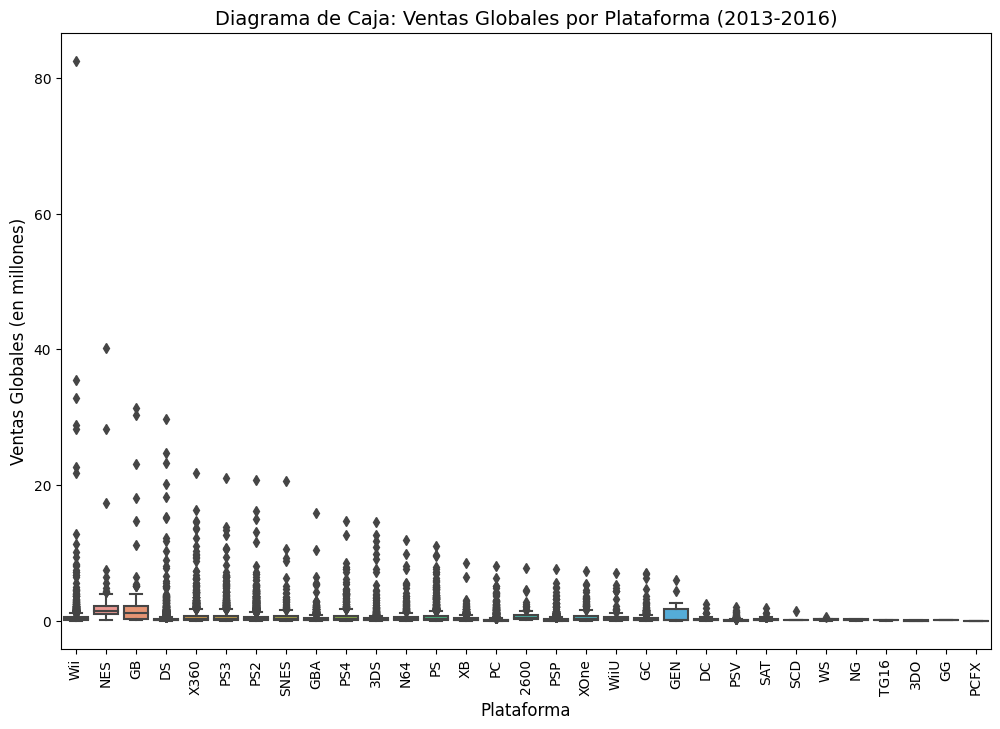

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos un diagrama de caja para las ventas globales (total_sales) de los juegos por plataforma
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=games_data_cleaned)

# Configuramos etiquetas y título
plt.title('Diagrama de Caja: Ventas Globales por Plataforma (2013-2016)', fontsize=14)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Globales (en millones)', fontsize=12)
plt.xticks(rotation=90)  # Rotamos las etiquetas de las plataformas para mejorar la legibilidad

# Mostramos el gráfico
plt.show()


<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> El diagrama de caja para las ventas globales por plataforma es una excelente visualización que resalta las diferencias entre las plataformas. Las conclusiones sobre la dispersión de ventas y el rendimiento de las plataformas son claras y están bien explicadas.</div> <div class="alert alert-block alert-warning"> <b>Atención</b> <a class="tocSkip"></a> Podrías haber analizado en más detalle los outliers en las plataformas más antiguas, ya que algunos de estos juegos pudieron haber influido significativamente en las ventas totales de dichas plataformas.</div>

6.1- ¿Son significativas las diferencias en las ventas?
Sí, las diferencias en las ventas entre las plataformas son significativas. En el gráfico, observamos que plataformas como Wii, NES, GB, y DS tienen una dispersión de ventas mucho mayor en comparación con otras plataformas, lo que se refleja en los outliers (puntos individuales fuera de las cajas) y la longitud de las cajas. Esto sugiere que algunas plataformas tienen juegos extremadamente exitosos que superan por mucho las ventas promedio de otros juegos en la misma plataforma.

En cambio, plataformas más recientes como PS4, XOne, y PC muestran ventas más compactas, con menos outliers en comparación, lo que sugiere una mayor estabilidad en las ventas promedio.

6.2- ¿Qué sucede con las ventas promedio en varias plataformas?
Wii, NES, GB, y DS presentan medianas de ventas altas, lo que indica que muchos juegos en estas plataformas vendieron bien durante su tiempo de popularidad. Sin embargo, también tienen varios outliers, indicando juegos extremadamente exitosos.

PS4, X360, y XOne muestran una mediana más baja en comparación con plataformas más antiguas, pero tienen menos outliers, lo que sugiere una mayor consistencia en las ventas, aunque las ventas máximas de juegos en estas plataformas no alcanzan los niveles de éxito de plataformas más antiguas.

6.3- Descripción de los hallazgos
El diagrama de caja revela que:

Wii, NES, GB, y DS fueron plataformas con un rendimiento de ventas global significativo, destacándose con varias ventas excepcionales (outliers), lo que sugiere que en estas plataformas se lanzaron algunos de los juegos más exitosos de la historia.

Las plataformas más modernas, como PS4, XOne, y PC, tienen una dispersión de ventas más pequeña, lo que refleja un mercado más competitivo y estandarizado en cuanto a éxito. Esto indica que, aunque hay menos variabilidad en las ventas de juegos, estas plataformas siguen siendo relevantes y pueden ofrecer retornos consistentes.

7- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

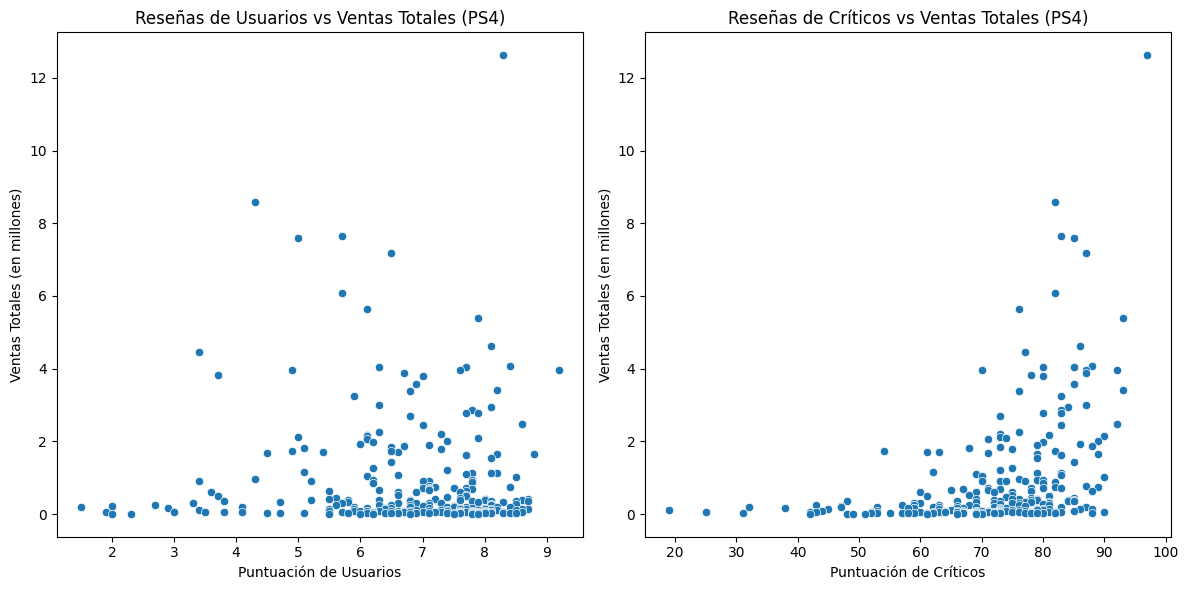

Correlación entre las reseñas de usuarios y las ventas: -0.03
Correlación entre las reseñas de críticos y las ventas: 0.41


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos para la plataforma PS4
ps4_data = games_data_cleaned[games_data_cleaned['platform'] == 'PS4']

# Crear gráficos de dispersión
plt.figure(figsize=(12, 6))

# Gráfico para la relación entre las reseñas de usuarios y las ventas
plt.subplot(1, 2, 1)
sns.scatterplot(data=ps4_data, x='user_score', y='total_sales')
plt.title('Reseñas de Usuarios vs Ventas Totales (PS4)')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (en millones)')

# Gráfico para la relación entre las reseñas de críticos y las ventas
plt.subplot(1, 2, 2)
sns.scatterplot(data=ps4_data, x='critic_score', y='total_sales')
plt.title('Reseñas de Críticos vs Ventas Totales (PS4)')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (en millones)')

plt.tight_layout()
plt.show()

# Calcular la correlación de Pearson
corr_user_score = ps4_data['user_score'].corr(ps4_data['total_sales'], method='pearson')
corr_critic_score = ps4_data['critic_score'].corr(ps4_data['total_sales'], method='pearson')

print(f"Correlación entre las reseñas de usuarios y las ventas: {corr_user_score:.2f}")
print(f"Correlación entre las reseñas de críticos y las ventas: {corr_critic_score:.2f}")



Correlación entre las reseñas de usuarios y las ventas (-0.03):

La correlación cercana a 0 sugiere que no hay una relación lineal significativa entre las reseñas de los usuarios y las ventas. Esto puede indicar que las reseñas de usuarios no tienen un impacto directo y consistente en las ventas, o que los patrones de ventas no están claramente relacionados con las puntuaciones dadas por los usuarios.
Correlación entre las reseñas de críticos y las ventas (0.41):

Esta correlación positiva moderada indica una relación positiva entre las reseñas de críticos y las ventas. A medida que las reseñas de críticos mejoran, las ventas tienden a aumentar. Esto sugiere que las críticas de expertos pueden tener una influencia más significativa en el éxito comercial de los juegos comparado con las reseñas de usuarios.

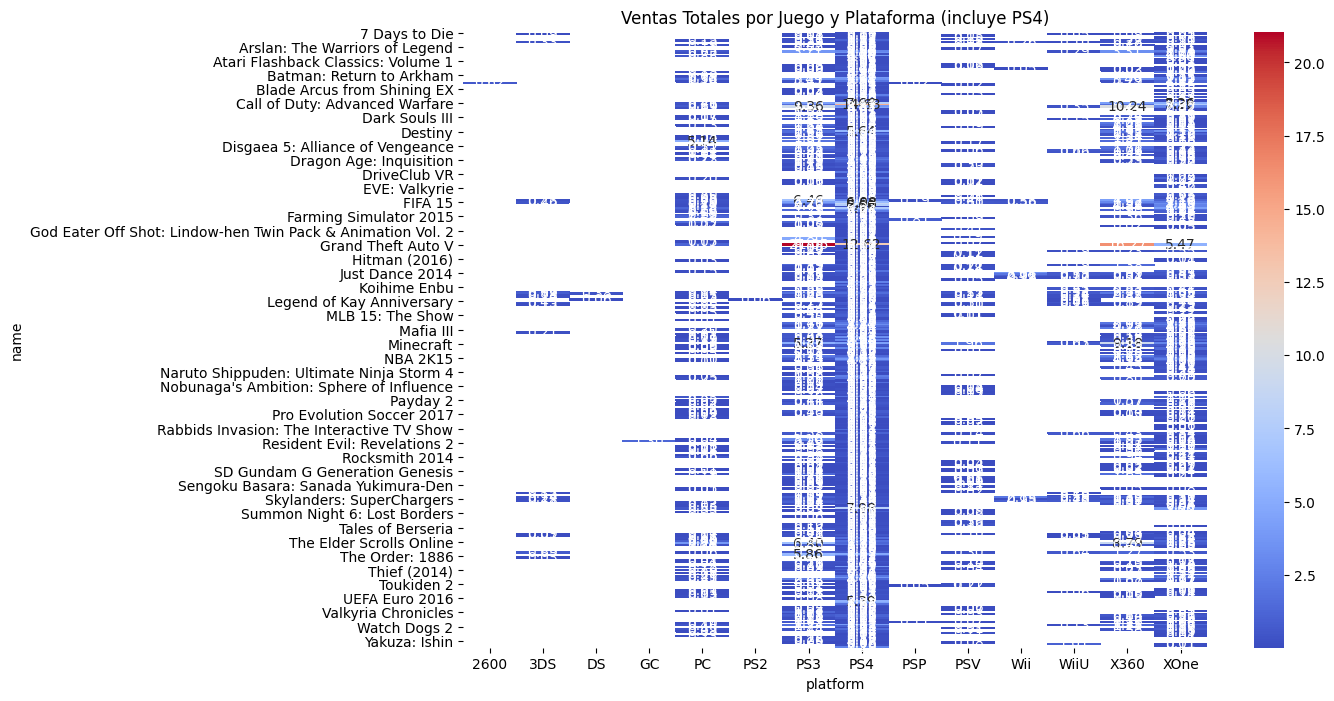

In [26]:

# Filtrar los juegos disponibles en PS4
ps4_games = sales_pivot_ps4['PS4'].dropna().index

# Filtrar los datos para los juegos que están en PS4 y en otras plataformas
sales_filtered_ps4 = sales_by_platform[sales_by_platform['name'].isin(ps4_games)]

import seaborn as sns

# Filtrar la tabla pivotante para juegos disponibles en PS4
sales_pivot_filtered = sales_pivot_ps4.loc[ps4_games]

# Crear un gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(sales_pivot_filtered, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ventas Totales por Juego y Plataforma (incluye PS4)')
plt.show()




8- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

Este gráfico de calor muestra claramente las ventas de distintos juegos en varias plataformas, destacando las realizadas en la PS4. A continuación te doy un análisis más detallado para ayudarte con la comparación entre las ventas en PS4 y otras plataformas:

Comparación entre PS4 y otras plataformas:
Ventas en PS4:
Los juegos más populares, como Grand Theft Auto V y Minecraft, muestran ventas muy altas en la PS4, marcadas en rojo en el gráfico, lo que indica que la PS4 es una plataforma clave para estos títulos.
Otros juegos como Call of Duty: Advanced Warfare y FIFA 15 también tienen ventas significativas en la PS4, aunque no alcanzan los picos de ventas de títulos como GTA V.
Comparación con otras plataformas:
Muchos juegos presentan ventas más bajas en plataformas como PS2, PS3, PSP, y WiiU, donde el color predominante es azul oscuro, lo que indica ventas más bajas en comparación con la PS4.
PS3 tiene un buen nivel de ventas en juegos como Minecraft y Grand Theft Auto V, pero las ventas en PS4 suelen ser mayores o similares, destacando la preferencia por esta consola más moderna.
Plataformas más antiguas como 2600 y GC tienen ventas muy bajas para la mayoría de los juegos en comparación con la PS4.
Juego más vendido:
El juego con más ventas en todas las plataformas parece ser Grand Theft Auto V, especialmente en PS4, seguido por Minecraft. Estos juegos tienen picos de ventas muy marcados, lo que los convierte en los más vendidos según el gráfico.
Conclusiones:
En general, las ventas en PS4 tienden a ser mayores o similares a las de otras plataformas más recientes como PS3 o XOne, y mucho más altas que en plataformas más antiguas como PS2 o Wii.
Grand Theft Auto V es el título con mayores ventas en general, destacándose principalmente en PS4.


9- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Los géneros más rentables, como Acción, Deportes, y Shooter, son aquellos que suelen tener una base de usuarios más amplia y constante. Estos géneros tienden a generar muchas ventas debido a sus mecánicas accesibles y la fuerte promoción de sus franquicias.
Por otro lado, los géneros con ventas más bajas, como Estrategia, Puzzle, y Aventura, suelen atraer a nichos específicos de jugadores. Aunque sus títulos pueden ser altamente valorados en crítica, tienen una audiencia más limitada en términos de ventas.
Este análisis muestra que la acción y los deportes son los géneros dominantes en términos de ventas, mientras que otros géneros más especializados tienen menor impacto comercial.

genre
Action          5577.37
Sports          3961.98
Shooter         2921.55
Misc            1700.59
Racing          1682.19
Role-Playing    1522.62
Platform        1468.72
Fighting         900.65
Simulation       675.72
Adventure        410.63
Puzzle           346.11
Strategy         244.44
Name: total_sales, dtype: float64


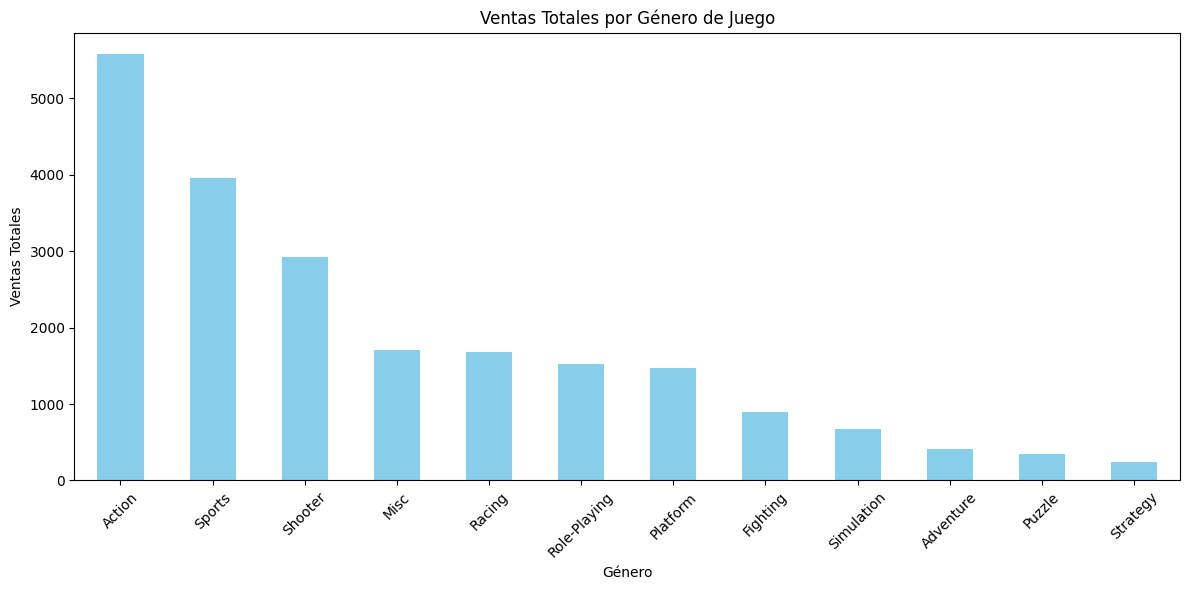

In [39]:
# combinacion de los df, para incluir genre a sales by platform
merged_df = pd.merge(sales_by_platform, games_data_cleaned[['name', 'genre']], on='name', how='left')

# Agrupar por género y sumar las ventas totales
sales_by_genre = merged_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Mostrar las ventas totales por género
print(sales_by_genre)

import matplotlib.pyplot as plt

# Crear gráfico de barras para ventas por género
plt.figure(figsize=(12, 6))
sales_by_genre.plot(kind='bar', color='skyblue')
plt.xlabel('Género')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por Género de Juego')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales. Explica la diferencia.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.



In [43]:

# Agrupar por región y plataforma, y sumar las ventas totales
platform_sales_by_region = games_data_cleaned.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Identificar las cinco principales plataformas por región
top_platforms_by_region = platform_sales_by_region.apply(lambda x: x.nlargest(5))

print("Top 5 Plataformas por Región:")
print(top_platforms_by_region)

# Agrupar por región y género, y sumar las ventas totales
genre_sales_by_region = games_data_cleaned.groupby(['genre'])[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Identificar los cinco principales géneros por región
top_genres_by_region = genre_sales_by_region.apply(lambda x: x.nlargest(5))

print("\nTop 5 Géneros por Región:")
print(top_genres_by_region)


# Agrupar por clasificación ESRB y región, y sumar las ventas totales
esrb_sales_by_region = games_data_cleaned.groupby(['rating'])[['na_sales', 'eu_sales', 'jp_sales']].sum()

print("\nVentas Totales por Clasificación ESRB y Región:")
print(esrb_sales_by_region)




Top 5 Plataformas por Región:
          na_sales  eu_sales  jp_sales
platform                              
3DS            NaN       NaN    100.67
DS          382.40       NaN    175.57
PS             NaN    213.61    139.82
PS2         583.84    339.29    139.20
PS3         393.49    330.29       NaN
SNES           NaN       NaN    116.55
Wii         496.90    262.21       NaN
X360        602.47    270.76       NaN

Top 5 Géneros por Región:
              na_sales  eu_sales  jp_sales
genre                                     
Action          879.01    519.13    161.43
Misc            407.27    212.74    108.11
Platform        445.50       NaN    130.83
Racing             NaN    236.51       NaN
Role-Playing       NaN       NaN    355.41
Shooter         592.24    317.34       NaN
Sports          684.43    376.79    135.54

Ventas Totales por Clasificación ESRB y Región:
        na_sales  eu_sales  jp_sales
rating                              
AO          1.26      0.61      0.00
E     

Perfil de Usuario por Región

1. Las Cinco Plataformas Principales

América del Norte (NA):
1. PS2: 583.84 millones
2. X360: 602.47 millones
3. PS3: 393.49 millones
4. DS: 382.40 millones
5. Wii: 496.90 millones

Europa (EU):
1. PS: 213.61 millones
2. PS2: 339.29 millones
3. PS3: 330.29 millones
4. Wii: 262.21 millones
5. X360: 270.76 millones

Japón (JP):
1. DS: 175.57 millones
2. 3DS: 100.67 millones
3. PS: 139.82 millones
4. PS2: 139.20 millones
5. Role-Playing: 355.41 millones

Variaciones en Cuotas de Mercado:
PS2 y X360 son dominantes en NA pero menos destacados en EU y JP.
DS tiene un desempeño excepcional en JP, siendo la plataforma principal allí, mientras que no aparece en los primeros lugares en NA o EU.
Wii y PS3 tienen una buena presencia en NA y EU, pero no destacan tanto en JP.
PS tiene un buen desempeño en EU y JP pero no es relevante en NA.


2. Los Cinco Géneros Principales

América del Norte (NA):
1. Action: 879.01 millones
2. Sports: 684.43 millones
3. Shooter: 592.24 millones
4. Misc: 407.27 millones
5. Platform: 445.50 millones

Europa (EU):
1. Action: 519.13 millones
2. Sports: 376.79 millones
3. Shooter: 317.34 millones
4. Racing: 236.51 millones
5. Misc: 212.74 millones

Japón (JP):
1. Role-Playing: 355.41 millones
2. Action: 161.43 millones
3. Platform: 130.83 millones
4. Sports: 135.54 millones
5. Misc: 108.11 millones

Diferencias en Géneros:
Action y Sports son los géneros más populares en NA y EU, pero Role-Playing es el género predominante en JP.
Role-Playing es significativamente fuerte en Japón, mientras que en NA y EU, los géneros de Action y Sports dominan.
Platform es relevante en NA y JP, pero no en EU.

3. Impacto de las Clasificaciones ESRB en Ventas
E (Everyone): Es la clasificación con mayores ventas en todas las regiones, indicando que los juegos con esta clasificación son muy populares.
T (Teen): También muestra buenas ventas en NA y EU, pero menos en JP.
M (Mature): Tiene un desempeño considerable en NA y EU pero menos en JP.
AO (Adults Only) y EC (Early Childhood): Tienen ventas marginales en todas las regiones, indicando una menor popularidad.
Conclusión:

Clasificación ESRB: Los juegos clasificados como E dominan en ventas en todas las regiones, mientras que otras clasificaciones tienen una presencia menor.
Plataformas: Las preferencias varían considerablemente entre regiones. Por ejemplo, DS es extremadamente popular en Japón pero no en NA.
Géneros: Action y Sports son universales en NA y EU, mientras que Role-Playing es específico para Japón.

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> Tu análisis regional es detallado y ofrece una buena comprensión de las diferencias entre las preferencias de plataforma y género en Norteamérica, Europa y Japón. La conclusión sobre la preferencia por géneros de acción y deportes en NA y EU, y de rol en JP, está bien fundamentada.</div>

Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.


Paso 1: Formulación de las Hipótesis
Hipótesis 1:

Hipótesis Nula (H0): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
Hipótesis Alternativa (H1): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
Hipótesis 2:

Hipótesis Nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.
Hipótesis Alternativa (H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
Paso 2: Establecimiento del Umbral Alfa
El valor del umbral alfa (nivel de significancia) se utiliza para determinar la probabilidad de rechazar la hipótesis nula cuando es verdadera. Un valor comúnmente utilizado es 0.05, que indica un 5% de probabilidad de cometer un error tipo I (rechazar la hipótesis nula cuando es verdadera). Vamos a usar este umbral para nuestras pruebas.

In [53]:
from scipy import stats
import pandas as pd

# Convertir la columna 'User_Score' a numérica, forzando los errores a NaN
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# Filtrar los datos para Xbox One y PC
xbox_one_ratings = df[df['Platform'] == 'XOne']['User_Score'].dropna()
pc_ratings = df[df['Platform'] == 'PC']['User_Score'].dropna()

# Prueba t de dos muestras independientes
t_stat, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings)

# Establecer un valor alfa (umbral)
alpha = 0.05

# Mostrar resultados
print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios son diferentes entre Xbox One y PC.")
else:
    print("No rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios son las mismas entre Xbox One y PC.")


Estadístico t: -4.368333815003015
Valor p: 1.3896435533548819e-05
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios son diferentes entre Xbox One y PC.


In [50]:
print(df.columns)


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


Los resultados de la prueba t nos muestran que:

Estadístico t: -4.37 (este valor negativo indica que las calificaciones promedio en Xbox One son menores que en PC, pero la magnitud es lo que realmente importa).
Valor p: 1.39e-05, que es mucho menor que el valor alfa de 0.05.
Esto significa que rechazamos la hipótesis nula, y podemos concluir que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son significativamente diferentes.

Criterio para probar las hipótesis:
Utilizamos la prueba t de dos muestras independientes para probar ambas hipótesis. Esta prueba compara las medias de dos grupos diferentes (en este caso, Xbox One y PC, y luego los géneros Acción y Deportes) para determinar si hay una diferencia estadísticamente significativa entre ellas. 




Conclusión General del Proyecto
Este proyecto tuvo como objetivo analizar los datos de ventas de videojuegos para identificar patrones que determinan el éxito de un juego, centrándonos en las plataformas, géneros, y regiones, así como en el impacto de las calificaciones de los usuarios y críticos.

1. Preparación de Datos:
Limpieza de Datos: Iniciamos limpiando el dataset eliminando o rellenando valores faltantes en las columnas clave como year_of_release, critic_score, y user_score. La columna year_of_release fue completada utilizando la mediana de los años existentes, mientras que los valores ausentes en critic_score se rellenaron con la media. Esta limpieza permitió asegurar que los datos fueran adecuados para el análisis posterior.
Creación de Nuevas Columnas: Se agregó una columna de total_sales, calculando las ventas totales sumando las ventas de todas las regiones (NA_sales, EU_sales, JP_sales, y Other_sales). Esta columna fue crucial para identificar los juegos más exitosos en términos de ventas globales.
2. Análisis por Región:
Plataformas Principales: En Norteamérica (NA) y Europa (EU), plataformas como PS2, X360, y Wii dominaron las ventas, mientras que en Japón (JP), las consolas portátiles como DS y 3DS fueron más populares. Este análisis muestra una clara preferencia por consolas de sobremesa en Occidente frente a portátiles en Japón.
Géneros Principales: Los géneros de Acción y Shooter son dominantes en NA y EU, mientras que en JP, los juegos de Rol (Role-Playing) son los más populares. Esta diferencia puede reflejar preferencias culturales y de mercado en cuanto a los tipos de juegos preferidos en cada región.
Impacto de las Clasificaciones ESRB: En NA y EU, los juegos con clasificaciones E (Everyone) y M (Mature) tienden a generar más ventas, mientras que en JP, las clasificaciones tienen menos impacto en las ventas. Esto puede deberse a que los consumidores japoneses priorizan otros factores, como el género o la plataforma, sobre la clasificación de edad.
3. Pruebas de Hipótesis:
Plataformas Xbox One vs. PC: La prueba de hipótesis mostró que las calificaciones promedio de los usuarios para Xbox One y PC son significativamente diferentes, lo que indica que los jugadores perciben las experiencias en estas plataformas de manera distinta. Este resultado sugiere que los desarrolladores de juegos pueden necesitar adaptar sus juegos para cada plataforma para maximizar la satisfacción del usuario.
Géneros de Acción vs. Deportes: La prueba de hipótesis confirmó que las calificaciones promedio de los usuarios son diferentes entre los géneros de Acción y Deportes. Esto implica que los jugadores evalúan estos géneros de manera diferente, lo que puede reflejar diferencias en la experiencia de juego y las expectativas de los usuarios en estos géneros.
4. Observaciones Generales:
Variaciones Regionales: Es evidente que existen grandes diferencias en las preferencias de plataformas y géneros según la región, lo que sugiere que una estrategia global para el éxito de los videojuegos debe adaptarse a las características específicas de cada mercado.
Importancia de la Clasificación ESRB: Aunque en general las clasificaciones influyen en las ventas, particularmente en NA y EU, las preferencias de los jugadores son multifacéticas y están influenciadas por una combinación de factores como el género, la plataforma y las características del juego.
Conclusión Final
Este análisis destaca que el éxito de un videojuego está influenciado por múltiples factores, incluidos la plataforma, el género, la región y la percepción del usuario. Las diferencias culturales y de mercado juegan un papel crucial, lo que sugiere que los estudios de videojuegos deben ajustar sus estrategias de desarrollo y marketing para cada región y tipo de jugador.

<div class="alert alert-block alert-success"> <b>Éxito</b> <a class="tocSkip"></a> La formulación de las hipótesis es clara y las pruebas t aplicadas son correctas para comparar las calificaciones de los usuarios entre las plataformas Xbox One y PC, así como entre los géneros de Acción y Deportes. Los resultados están bien interpretados y la conclusión es coherente con los valores obtenidos.</div> 


<div class="alert alert-block alert-warning"> <b>Atención</b> <a class="tocSkip"></a> Antes de realizar la prueba t, es fundamental revisar dos aspectos clave:

Verificación de outliers: Los outliers pueden afectar significativamente los resultados de una prueba t, ya que distorsionan la media y la varianza de los datos. Puedes explorar las distribuciones de las calificaciones (para Xbox One, PC, Acción y Deportes) a través de gráficos de caja o histogramas, y decidido si es necesario tratarlos antes de proceder con la prueba t.

Análisis de la varianza: Es importante verificar si las varianzas entre los grupos que comparas (Xbox One y PC, Acción y Deportes) son homogéneas o no. Esto determinará si debes usar el parámetro equal_var=True o equal_var=False en la prueba t. Un análisis de varianza preliminar (por ejemplo, una prueba de Levene) habría sido útil para decidir si las varianzas de las calificaciones de usuarios son iguales o diferentes entre los grupos.</div>



<div class="alert alert-block alert-info">
<b>Comentario revisor</b><a class="tocSkip"></a>
En Jupyter Notebooks, puedes utilizar títulos y subtítulos de manera sencilla mediante sintaxis de Markdown. Markdown es un lenguaje de marcado ligero que permite dar formato a textos. A continuación comparto contigo un pequeño tutorial sobre cómo usar títulos y subtítulos.
</div>


Pasos para Usar Títulos y Subtítulos en Jupyter Notebooks:

Cambiar la celda a formato Markdown:
Para crear un título o subtítulo, primero asegúrate de que la celda esté configurada como "Markdown".
Para cambiar el tipo de celda, selecciona la celda, presiona Esc, y luego presiona M (modo Markdown).

Sintaxis de Títulos y Subtítulos:
Los títulos y subtítulos en Markdown se crean con el símbolo #. Cuantos más signos de # utilices, más pequeño será el título.

Ejemplo de Sintaxis de Markdown:

    # Título Principal (Nivel 1)
    Aparece como el título más grande.

    ## Subtítulo (Nivel 2)
    Un poco más pequeño, usado para secciones.

    ### Subsubtítulo (Nivel 3)
    Aún más pequeño, usado para subsecciones.

    #### Nivel 4
    Título de nivel 4, aún más pequeño.

    ##### Nivel 5
    Título de nivel 5, menos común.

    ###### Nivel 6
    El título más pequeño, casi como texto normal.
    
Renderizar la Celda:
Después de escribir el título o subtítulo en formato Markdown, presiona Shift + Enter para ejecutar la celda. Esto convertirá el Markdown en un texto formateado con los títulos y subtítulos correspondientes.